In [ ]:
!pip uninstall -y gensim numpy

# 2) Install a compatible pair (works well on Py3.12)
!pip install --no-cache-dir numpy==1.26.4 gensim==4.3.3

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 214.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 243.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 211.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>

In [ ]:
import numpy as np, gensim
print("NumPy:", np.__version__)
print("Gensim:", gensim.__version__)  # should be 1.26.4 / 4.3.3


NumPy: 1.26.4
Gensim: 4.3.3


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
document= pd.read_csv('/content/drive/MyDrive/Great Learning/stock_news.csv')

In [ ]:
df= document.copy()

DATA OVERVIEW

In [ ]:
df.head()


,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
df.tail()

,Date,News,Open,High,Low,Close,Volume,Label
344,2019-04-30,"Media mogul Oprah Winfrey, known for influencing millions with her opinions on diets and books, is considering which Democratic presidential candidate to endorse in 2020. She told the Hollywood Reporter she's ""quietly figuring out where I'm going to use my voice"" and will make a clear announcement",50.764999,50.849998,49.7775,48.70879,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks underperforming amid a decline in China's manufacturing activity and awaiting euro zone economic growth numbers. The pan-European STOXX 600 index dropped 0.7% while major indices fell except London's FTSE 100. Danske Bank plunged",50.764999,50.849998,49.7775,48.70879,186139600,-1
346,2019-04-30,"This article reports that the S&P 500 reached another record high close on Tuesday, marking its best four-month stretch since late 2010. Apple's strong quarterly results and positive earnings forecast helped ease concerns about the bull run's sustainability, despite a revenue miss from Google parent Alphabet. The",50.764999,50.849998,49.7775,48.70879,186139600,-1
347,2019-04-30,"The Federal Reserve is anticipated to keep interest rates unchanged in their upcoming meeting, with a likelihood of a rate cut expected later this year. The Fed Chairman's press conference may provide significant market impact as investors seek insights on economic growth and inflation. Apple's earnings report exceeded expectations, leading to a post-market surge in shares, while",50.764999,50.849998,49.7775,48.70879,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung Electronics reported its weakest profit in over two years due to falls in chip prices and slowing demand for display panels. The tech giant expects improved results in the second half of 2019, driven by a pickup in memory chip and smartphone sales. However, memory chip",50.764999,50.849998,49.7775,48.70879,186139600,0


In [ ]:
df.shape

(349, 8)

In [ ]:
df.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date']= pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day

In [ ]:
df.head()

,Date,News,Open,High,Low,Close,Volume,Label,year,month,day
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume,Label,year,month,day
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349.0,349.000000,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441,2019.0,2.077364,15.389685
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000,2019.0,1.000000,1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000,2019.0,1.000000,6.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000,2019.0,2.000000,15.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000,2019.0,3.000000,24.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000,2019.0,4.000000,31.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119,0.0,1.177997,9.351840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
 8   year    349 non-null    int32         
 9   month   349 non-null    int32         
 10  day     349 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2), object(1)
memory usage: 26.0+ KB


EDA ANALYSIS

   Label  Percentage
0      0   48.710602
1     -1   28.366762
2      1   22.922636


/tmp/ipython-input-3614508260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= label_percentages ,x='Label' , y= 'Percentage', palette='Set2')


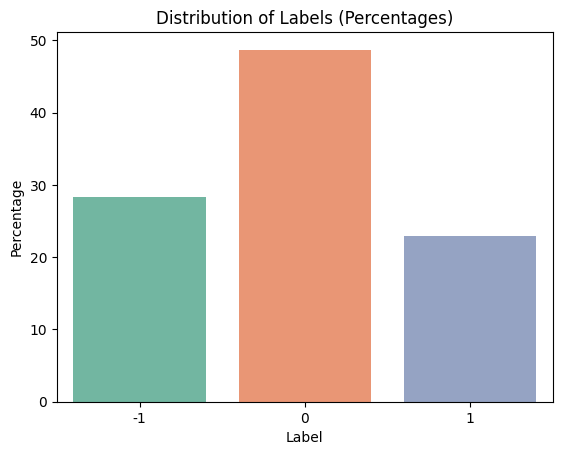

In [ ]:
# Univariate Analysis
label_percentages = (df['Label'].value_counts(normalize=True) * 100).reset_index()
label_percentages.columns = ['Label', 'Percentage']
print(label_percentages)
sns.barplot(data= label_percentages ,x='Label' , y= 'Percentage', palette='Set2')
plt.title("Distribution of Labels (Percentages)")
plt.xlabel("Label")
plt.ylabel("Percentage")
plt.show()



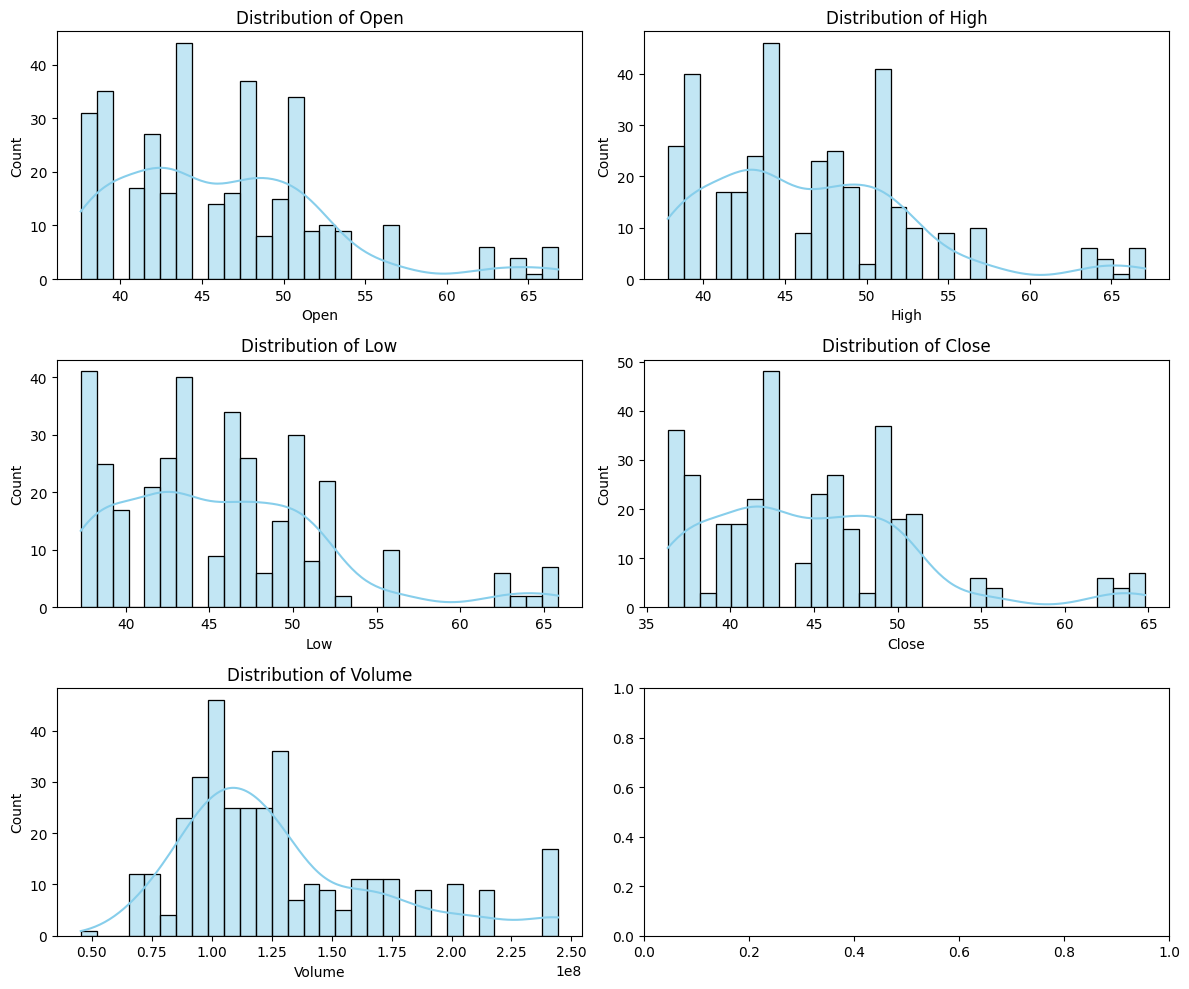

In [ ]:
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

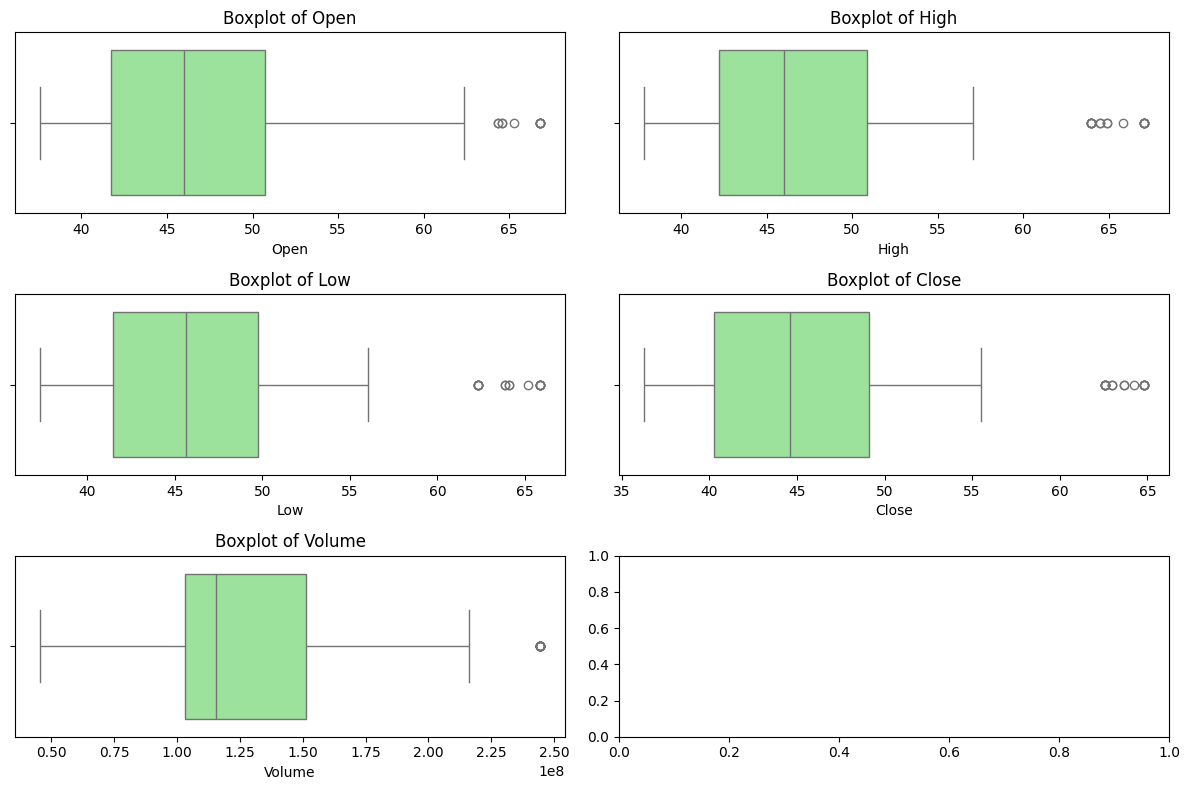

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))  # 3 rows, 2 columns
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="lightgreen")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

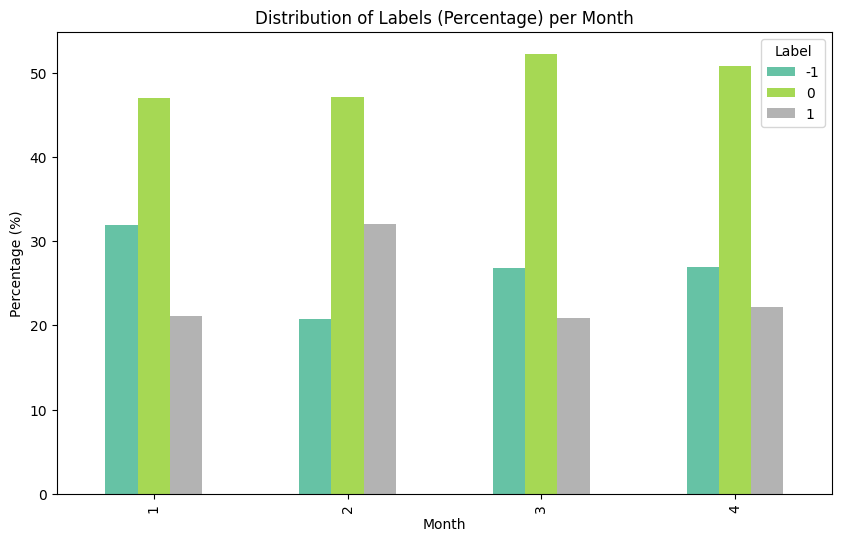

In [ ]:
# Bivariate Analysis
ct_month = pd.crosstab(df['month'], df['Label'], normalize='index') * 100

ct_month.plot(kind='bar', figsize=(10,6), colormap="Set2")

plt.title("Distribution of Labels (Percentage) per Month")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend(title="Label")
plt.show()

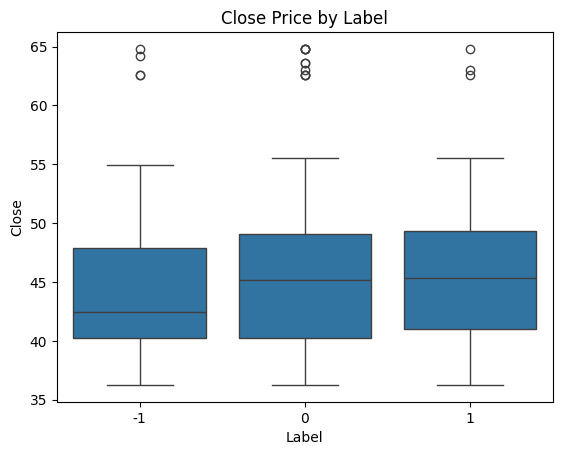

In [ ]:
sns.boxplot(x='Label', y='Close', data=df)
plt.title("Close Price by Label")
plt.show()

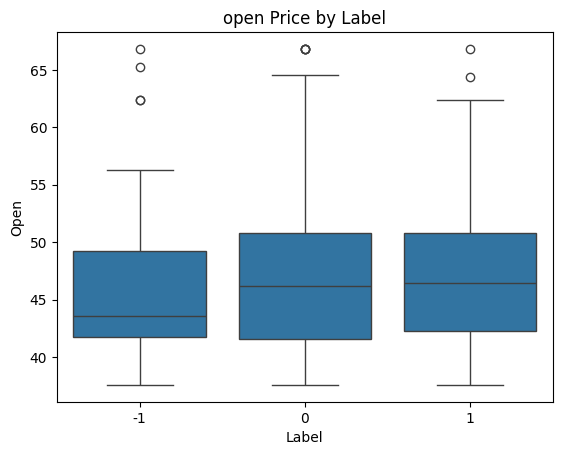

In [ ]:
sns.boxplot(x='Label', y='Open', data=df)
plt.title("open Price by Label")
plt.show()

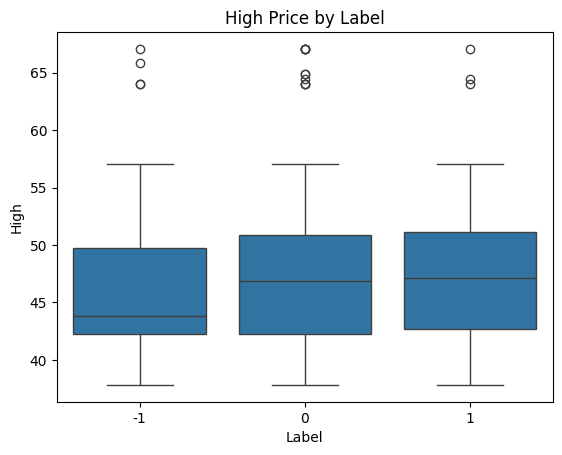

In [ ]:
sns.boxplot(x='Label', y='High', data=df)
plt.title("High Price by Label")
plt.show()

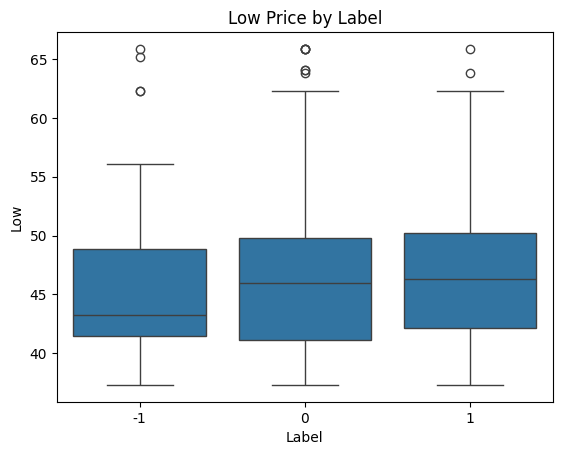

In [ ]:
sns.boxplot(x='Label', y='Low', data=df)
plt.title("Low Price by Label")
plt.show()

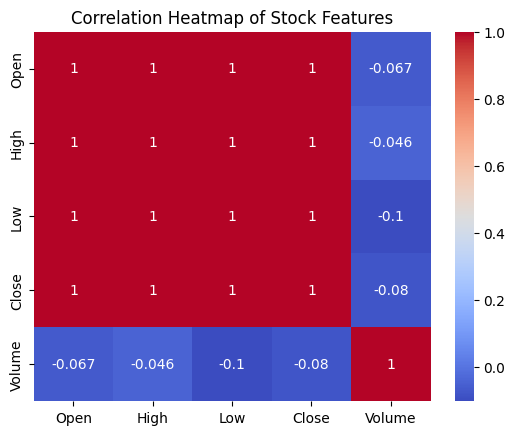

In [ ]:
corr = df[['Open','High','Low','Close','Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Stock Features")
plt.show()

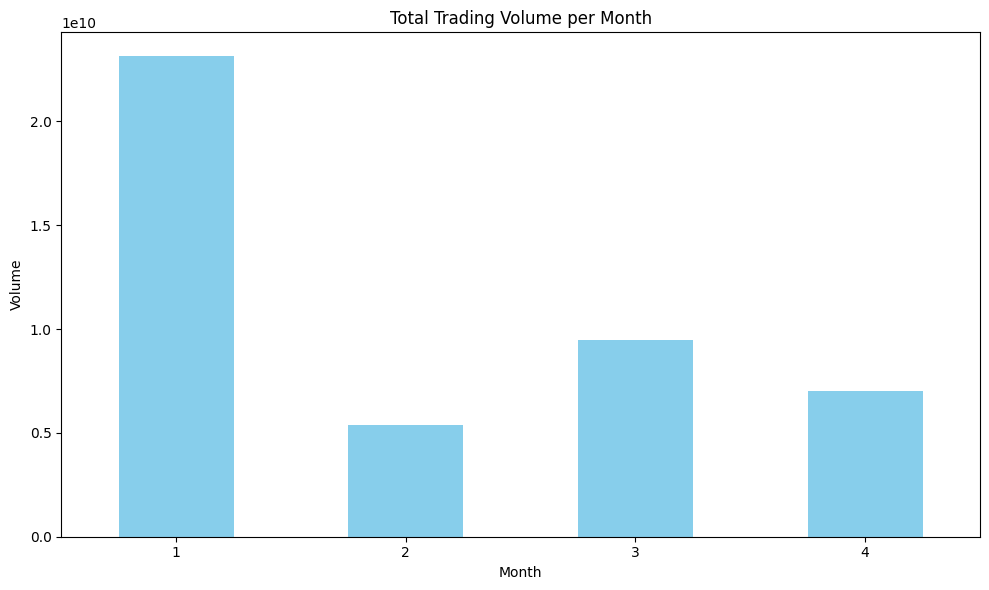

In [ ]:
monthly_volume = df.groupby('month')['Volume'].sum()

monthly_volume.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Total Trading Volume per Month")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

DATA SPLITTING

In [ ]:
X = df['News']
y = df['Label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((279,), (35,), (35,))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((279,), (35,), (35,))

DATA PPREPROCESSING

In [ ]:
ps = PorterStemmer()

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Apply stemming
    words = [ps.stem(word) for word in words]

    # Join back into a single string
    text = ' '.join(words)

    return text

In [ ]:
X_train_clean= X_train.apply(preprocess_text)
X_val_clean= X_val.apply(preprocess_text)
X_test_clean= X_test.apply(preprocess_text)

In [ ]:
X_train_clean.head()

,News
269,appl set unveil televis movi stream servic monday along new game subscript servic app store game servic focu iphon ipad bundl togeth paid game variou develop monthli fee notabl servic wont compet directli cloudbas offer
310,tomtom dutch navig digit map firm report increas first quarter revenu million beat analyst forecast compani secur two contract suppli high definit hd map major carmak posit earli player grow market tomtom
222,ibm ceo ginni rometti appl ceo tim cook among corpor leader attend white hous forum discuss hire american without colleg degre due shortag applic open job rometti state less fouryear degre get good pay job new economi
249,unexpect move appl introduc new ipad air updat ipad mini model ahead march event devic come latest bionic chip support appl pencil smart keyboard hardwar upgrad focu past event year edit anticip emphas
333,indian state court lift ban popular videoshar app tiktok allow develop beij byted technolog co resum oper countri ban impos earlier month due concern pornograph content potenti child exposur sexual predat appl googl remov tiktok indian


WORD2VEC

In [ ]:
words_list_train = [item.split(" ") for item in X_train_clean.values]
words_list_val   = [item.split(" ") for item in X_val_clean.values]     # not used to fit, only for checks if needed
words_list_test  = [item.split(" ") for item in X_test_clean.values]

In [ ]:
vec_size = 300

# Create + fit W2V on TRAIN tokens only (professor style still, but no leakage)
model_W2V = Word2Vec(
    sentences=words_list_train,
    vector_size=vec_size,
    min_count=1,
    window=5,
    workers=6,
    sg=1,
    seed=42
)

words = list(model_W2V.wv.key_to_index.keys())
wvs   = model_W2V.wv[words].tolist()
word_vector_dict = dict(zip(words, wvs))


In [ ]:
def average_vectorizer_Word2Vec(doc):
    # init feature vector
    feature_vector = np.zeros((vec_size,), dtype="float64")
    # keep only words present in the trained W2V vocab
    words_in_vocab = [w for w in doc.split() if w in word_vector_dict]
    # sum vectors
    for w in words_in_vocab:
        feature_vector += np.array(word_vector_dict[w])
    # average
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)
    return feature_vector

In [ ]:
X_train_word2vec = X_train_clean.apply(average_vectorizer_Word2Vec).tolist()
X_val_word2vec   = X_val_clean.apply(average_vectorizer_Word2Vec).tolist()
X_test_word2vec  = X_test_clean.apply(average_vectorizer_Word2Vec).tolist()


In [ ]:
X_train_word2vec

[array([ 5.90491425e-03, -4.07708574e-02, -2.58223703e-02, -2.38260745e-02,
        -2.67444376e-02, -2.93603840e-02,  6.30526010e-02,  6.47417636e-04,
        -2.19462628e-02,  5.09403581e-02,  4.51898938e-02, -1.03807986e-02,
         3.32499858e-02,  3.57543048e-02, -1.44222671e-02, -2.13253960e-02,
         2.20678580e-02, -6.24992740e-02, -5.78570716e-02, -4.10781949e-02,
         5.16510816e-02,  5.64355141e-02, -7.12068442e-03,  8.03720554e-02,
         2.86204626e-02,  1.01386150e-02, -1.05529659e-01, -1.00729137e-02,
         3.42243442e-02,  3.39973527e-02, -2.32787777e-02, -5.39765058e-02,
        -3.13686344e-03,  2.24105450e-02,  2.57477650e-02,  2.47133680e-02,
         1.16799936e-02, -9.96976990e-02, -2.35279622e-02,  1.76150825e-02,
         3.45581561e-02,  2.31212423e-02,  3.74182151e-03,  2.47809848e-02,
         5.09009615e-02,  2.33619070e-02,  7.27849674e-02,  4.68531708e-02,
         5.10206458e-02,  5.57445813e-02, -3.64145292e-02, -3.60494744e-02,
         2.9

GLOVE

In [ ]:
from gensim.models import KeyedVectors

# Path to your file (the one with the header 400000 100)
word2vec_file = "/content/drive/MyDrive/Great Learning/(GP)glove.6B.100d.txt"

# Load directly (binary=False since it's text)
glove_model = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)

# Test a word
print(glove_model['the'][:10])  # first 10 values of 'the' embedding

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459]


In [ ]:
from gensim.models import KeyedVectors

filename = '/content/drive/MyDrive/Great Learning/(GP)glove.6B.100d.txt'   # your original file with header
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
print("Length of the vocabulary is", len(glove_model.index_to_key))


Length of the vocabulary is 400000


In [ ]:
word = "stock"
glove_model[word]


array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    feature_vector = np.zeros((vec_size,), dtype="float64")
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
X_train_glove = X_train_clean.apply(average_vectorizer_GloVe).tolist()

X_val_glove = X_val_clean.apply(average_vectorizer_GloVe).tolist()

X_test_glove = X_test_clean.apply(average_vectorizer_GloVe).tolist(),

SENTENCE TRANSFORMERS

In [ ]:
!pip install -q sentence-transformers

import torch
import numpy as np
from sentence_transformers import SentenceTransformer

# Load model (384-dim embeddings)
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Encode each split -> NumPy arrays of shape (n_samples, 384)
X_train_st = model.encode(
    X_train_clean.tolist(),
    device=device,
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=False  # keep raw embeddings; set True if you want L2-normalized vectors
).astype(np.float32)

X_val_st = model.encode(
    X_val_clean.tolist(),
    device=device,
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=False
).astype(np.float32)

X_test_st = model.encode(
    X_test_clean.tolist(),
    device=device,
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=False
).astype(np.float32)

print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(279, 384) (35, 384) (35, 384)


RANDOM FOREST MODEL FOR WORD2VEC

In [ ]:
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize=(5,4))
    labels = np.unique(actual)   # automatically get unique labels from your data
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
rf_word2vec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_word2vec_base.fit(X_train_word2vec, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_base = rf_word2vec_base.predict(X_train_word2vec)

# Predicting on test data
y_pred_val_base = rf_word2vec_base.predict(X_val_word2vec)

In [ ]:
word2vec_base_train=model_performance_classification_sklearn(rf_word2vec_base, X_train_word2vec,y_train)
print("Training performance:\n", word2vec_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
word2vec_base_val=model_performance_classification_sklearn(rf_word2vec_base, X_val_word2vec,y_val)
print("Validation Performance:\n", word2vec_base_val)

Validation Performance:
    Accuracy    Recall  Precision        F1
0  0.514286  0.514286   0.517898  0.446241


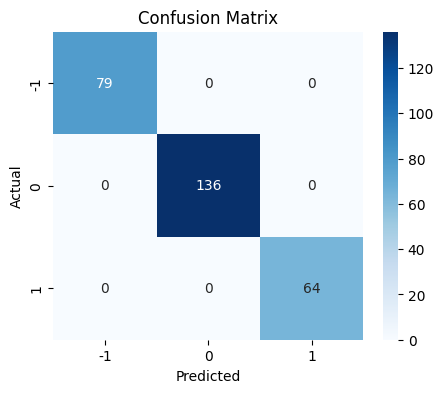

In [ ]:
plot_confusion_matrix(y_train,y_pred_train_base)

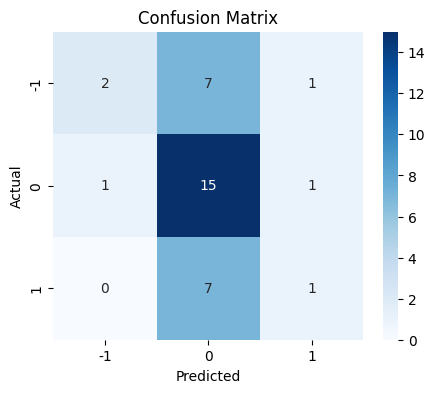

In [ ]:
plot_confusion_matrix(y_val,y_pred_val_base)

RANDOM FOREST WORD2VEC TUNED

In [ ]:
word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_rf_tuned, parameters, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train)

# Set the clf to the best combination of parameters
word2vec_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
word2vec_rf_tuned.fit(X_train_word2vec, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=0.3,
                       random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_base_tuned = word2vec_rf_tuned.predict(X_train_word2vec)

# Predicting on test data
y_pred_val_base_tuned = word2vec_rf_tuned.predict(X_val_word2vec)

In [ ]:
word2vec_base_train_tuned=model_performance_classification_sklearn(word2vec_rf_tuned, X_train_word2vec,y_train)
print("Training  Performance:\n", word2vec_base_train_tuned)

Training  Performance:
    Accuracy    Recall  Precision        F1
0  0.992832  0.992832   0.992935  0.992812


In [ ]:
word2vec_base_val_tuned=model_performance_classification_sklearn(word2vec_rf_tuned, X_val_word2vec,y_val)
print("Validation Performance:\n", word2vec_base_val_tuned)

Validation Performance:
    Accuracy    Recall  Precision        F1
0  0.485714  0.485714   0.442697  0.451719


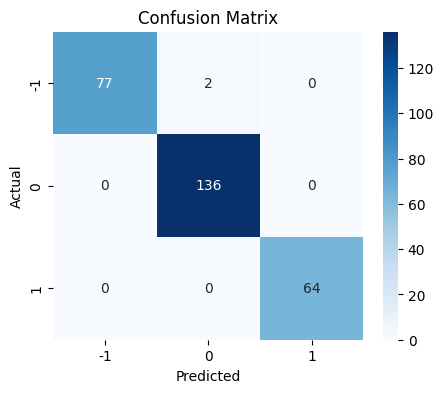

In [ ]:
plot_confusion_matrix(y_train,y_pred_train_base_tuned)

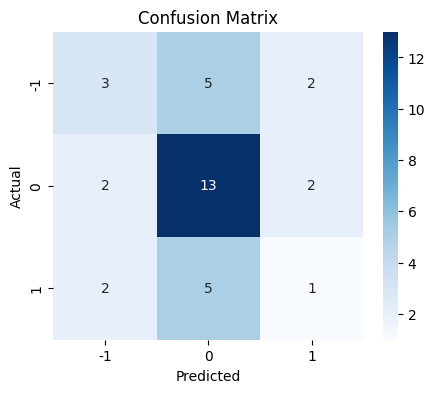

In [ ]:
plot_confusion_matrix(y_val,y_pred_val_base_tuned)

BASIC MODEL RANDOM FOREST FOR GLOVE

In [ ]:
rf_glove_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_glove_base.fit(X_train_glove , y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_train_base_glove = rf_glove_base.predict(X_train_glove)

# Predicting on test data
y_pred_val_base_glove = rf_glove_base.predict(X_val_glove)

In [ ]:
glove_base_train=model_performance_classification_sklearn(rf_glove_base, X_train_glove,y_train)
print("Training performance:\n",glove_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
glove_base_val=model_performance_classification_sklearn(rf_glove_base, X_val_glove,y_val)
print("Validation performance:\n", glove_base_val)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.371429  0.371429   0.269312  0.306349


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


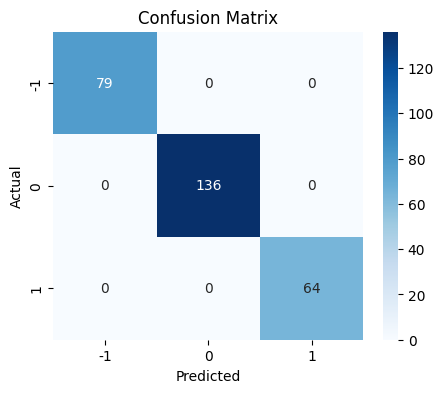

In [ ]:
plot_confusion_matrix(y_train,y_pred_train_base_glove)

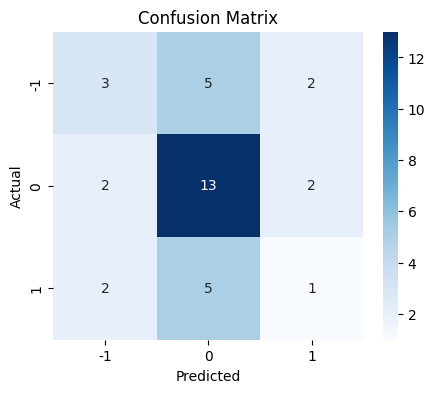

In [ ]:
plot_confusion_matrix(y_val,y_pred_val_base_tuned)

RANDOM FOREST GLOVE TUNED

In [ ]:
glove_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(glove_rf_tuned, parameters, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train)

# Set the clf to the best combination of parameters
glove_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
glove_rf_tuned.fit(X_train_glove, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       n_estimators=75, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_base_tuned = glove_rf_tuned.predict(X_train_glove)

# Predicting on test data
y_pred_val_base_tuned = glove_rf_tuned.predict(X_val_glove)

In [ ]:
glove_base_train_tuned =model_performance_classification_sklearn(glove_rf_tuned, X_train_glove,y_train)
print("Training performance:\n",glove_base_train_tuned)

Training performance:
    Accuracy   Recall  Precision        F1
0   0.97491  0.97491   0.975513  0.974998


In [ ]:
glove_base_val_tuned =model_performance_classification_sklearn(glove_rf_tuned, X_val_glove,y_val)
print("Validation performance:\n",glove_base_val_tuned)

Validation performance:
    Accuracy    Recall  Precision       F1
0  0.428571  0.428571   0.422932  0.42381


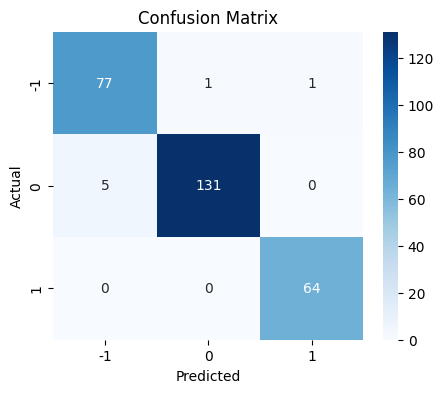

In [ ]:
plot_confusion_matrix(y_train,y_pred_train_base_tuned)

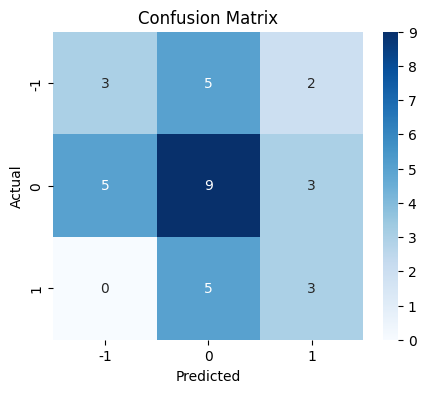

In [ ]:
plot_confusion_matrix(y_val,y_pred_val_base_tuned)

RANDOM FOREST FOR SENTENCE TRANSFORMER

In [ ]:
Transformer = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
Transformer.fit(X_train_st , y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_train_base_transformer = Transformer.predict(X_train_st)

# Predicting on test data
y_pred_val_base_transformer = Transformer.predict(X_val_st)

In [ ]:
Transformer_base_train=model_performance_classification_sklearn(Transformer, X_train_st,y_train)
print("Training performance:\n", Transformer_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
Transformer_base_validation=model_performance_classification_sklearn(Transformer, X_val_st,y_val)
print("Training performance:\n", Transformer_base_validation)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.371429  0.371429   0.203687  0.263095


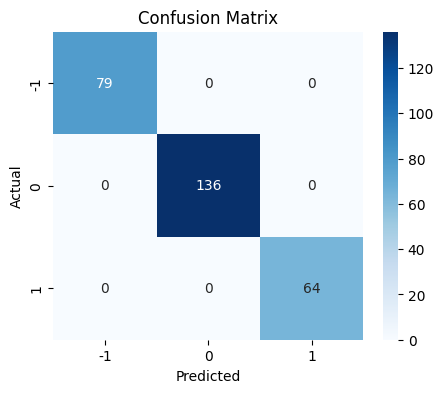

In [ ]:
plot_confusion_matrix(y_train,y_pred_train_base_transformer)

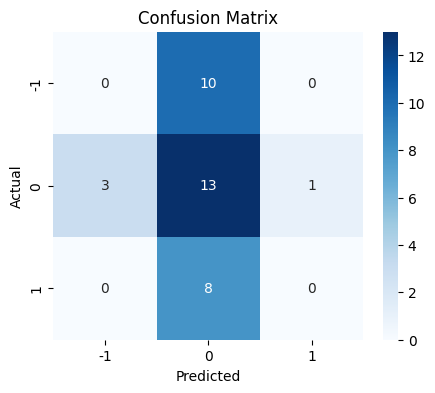

In [ ]:
plot_confusion_matrix(y_val,y_pred_val_base_transformer)

TUNED RANDOM FOREST FOR SENTENCE TRANSFORMER

In [ ]:
Transformer_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(Transformer_rf_tuned, parameters, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)

# Set the clf to the best combination of parameters
Transformer_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Transformer_rf_tuned.fit(X_train_st, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.4,
                       random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_base_tuned = Transformer_rf_tuned.predict(X_train_st)

# Predicting on test data
y_pred_val_base_tuned = Transformer_rf_tuned.predict(X_val_st)

In [ ]:
Transformer_base_train_tuned=model_performance_classification_sklearn(Transformer_rf_tuned, X_train_st,y_train)
print("Training performance:\n", Transformer_base_train_tuned)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
Transformer_base_val_tuned=model_performance_classification_sklearn(Transformer_rf_tuned, X_val_st,y_val)
print("Validation performance:\n", Transformer_base_val_tuned)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.342857  0.342857   0.318634  0.320159


COMPARISON OF PERFORMANCE

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [word2vec_base_train.T,word2vec_base_train_tuned.T,glove_base_train.T,glove_base_train_tuned.T,Transformer_base_train.T,Transformer_base_train_tuned.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF Tuned",
    "GloVe - Base RF Model",
    "GloVe - RF Tuned",
    "Transformer Base RF Model",
    "Tranformer RF Tuned"]
print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Word2vec - Base RF Model,Word2vec - RF Tuned,GloVe - Base RF Model,GloVe - RF Tuned,Transformer Base RF Model,Tranformer RF Tuned
Accuracy,1.0,0.992832,1.0,0.974910,1.0,1.0
Recall,1.0,0.992832,1.0,0.974910,1.0,1.0
Precision,1.0,0.992935,1.0,0.975513,1.0,1.0
F1,1.0,0.992812,1.0,0.974998,1.0,1.0


In [ ]:
# Validation Performance Comparisson
models_val_comp_df = pd.concat(
    [word2vec_base_val.T,word2vec_base_val_tuned.T,glove_base_val.T,glove_base_val_tuned.T,Transformer_base_validation.T,Transformer_base_val_tuned.T],
    axis=1,
)
models_val_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF Tuned",
    "GloVe - Base RF Model",
    "GloVe - RF Tuned",
    "Transformer Base RF Model",
    "Tranformer RF Tuned"]
print("validation performance comparison:")

models_val_comp_df


validation performance comparison:


,Word2vec - Base RF Model,Word2vec - RF Tuned,GloVe - Base RF Model,GloVe - RF Tuned,Transformer Base RF Model,Tranformer RF Tuned
Accuracy,0.514286,0.485714,0.371429,0.428571,0.371429,0.342857
Recall,0.514286,0.485714,0.371429,0.428571,0.371429,0.342857
Precision,0.517898,0.442697,0.269312,0.422932,0.203687,0.318634
F1,0.446241,0.451719,0.306349,0.423810,0.263095,0.320159


FINAL MODEL TRANSFORMER BASE RF MODEL

In [ ]:
# Predicting on test data
word_vec_base_model = rf_word2vec_base.predict(X_test_word2vec)

In [ ]:
Word_vec_base_model =model_performance_classification_sklearn(rf_word2vec_base, X_test_word2vec,y_test)
print("Test performance:\n", Word_vec_base_model)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.514286  0.514286   0.488776  0.445714


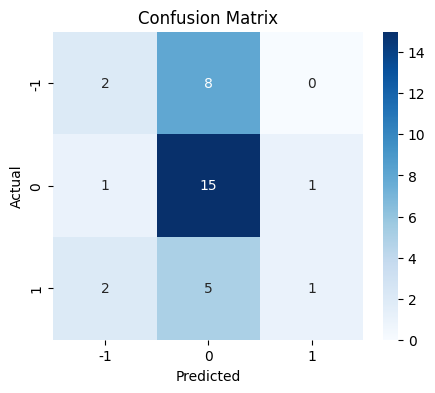

In [ ]:
plot_confusion_matrix(y_test,word_vec_base_model )

CONTENT SUMMARIZATION

In [ ]:
import pandas as pd
from datetime import datetime
from transformers import pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Great Learning/stock_news.csv',parse_dates=["Date"])

In [ ]:
df["Week"] = df["Date"].dt.to_period("W").apply(lambda r: r.start_time)

In [ ]:
def group_weekly_news(df):
    grouped = df.groupby("Week")
    weekly_data = []
    for week, group in grouped:
        positive_news = group[group["Label"] == 1]["News"].tolist()
        negative_news = group[group["Label"] == -1]["News"].tolist()
        weekly_data.append({
            "Week": week,
            "Positive_News": positive_news,
            "Negative_News": negative_news
        })
    return weekly_data

weekly_news = group_weekly_news(df)

In [ ]:
print(len(weekly_news))  # Should be 18

18


In [ ]:
weekly_news

[{'Week': Timestamp('2018-12-31 00:00:00'),
  'Positive_News': [" Roku Inc has announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel. Partners include CBS Corp's Showtime, Lionsgate's Starz, and Viacom Inc's Noggin. This model follows Amazon's successful Channels business, which generated an estimated",
   ' In Asia, gold prices rose to over six-month highs on concerns of a global economic slowdown and stock market volatility. Apple lowered its revenue forecast for the first quarter, leading Asian stocks to decline and safe haven assets like gold and Japanese yen to gain. Data showed weakened factory activity in Asia, particularly China, adding to',
   ' Oil prices rebounded on Thursday due to dollar weakness, signs of output cuts by Saudi Arabia, and weaker fuel oil margins leading Riyadh to lower February prices for heavier crude grades sold to Asia. The Organization of the Petroleum Exporting Countries (OPEC) led

In [ ]:
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", device= 0)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
def summarize_events(news_list, sentiment_type):
    if not news_list:
        return "No significant events."
    # Combine all news into one string (truncate if too long)
    combined_text = " ".join(news_list)[:4000]  # limit to avoid token overflow
    prompt = f"Summarize the top 3 {sentiment_type} events likely to impact stock prices: {combined_text}"
    summary = summarizer(prompt, max_length=150, min_length=50, do_sample=False)
    return summary[0]["summary_text"]

In [ ]:
test_news = [
    "Apple announced its quarterly earnings, beating analyst expectations with strong iPhone sales and record services revenue.",
    "The Federal Reserve signaled a potential rate hike in the upcoming quarter, citing persistent inflation concerns.",
    "Tesla unveiled its new Model Y with improved battery range and autonomous driving capabilities, boosting investor confidence.",
    "Amazon reported slower-than-expected growth in its cloud division, causing a slight dip in its stock price.",
    "Microsoft launched a new AI-powered productivity suite, integrating Copilot into Office 365, drawing attention from enterprise clients.",
    "Google faced regulatory scrutiny in Europe over its advertising practices, with potential fines looming.",
    "Meta Platforms announced a strategic shift toward mixed reality, investing heavily in its Quest headset lineup.",
    "Oil prices surged after OPEC+ announced production cuts, raising concerns about global energy costs.",
    "Gold prices rose as investors sought safe haven assets amid geopolitical tensions in the Middle East.",
    "Netflix added 10 million new subscribers globally, driven by strong performance in Asia and Latin America."
]

In [ ]:
print(summarize_events(test_news, "mixed"))

 Apple beat analyst expectations with strong iPhone sales and record services revenue . Amazon reported slower-than-expected growth in its cloud division . Netflix added 10 million new subscribers globally, driven by strong performance in Asia and Latin America . Google faced regulatory scrutiny in Europe over its advertising practices, with potential fines looming .


In [ ]:
from tqdm import tqdm

summary_output = []
for week_data in tqdm(weekly_news, desc="Summarizing weekly news"):
    week = week_data["Week"]
    pos_summary = summarize_events(week_data["Positive_News"], "positive")
    neg_summary = summarize_events(week_data["Negative_News"], "negative")
    summary_output.append({
        "Week": week,
        "Top_Positive_Events": pos_summary,
        "Top_Negative_Events": neg_summary
    })

Summarizing weekly news:  72%|███████▏  | 13/18 [06:44<02:25, 29.05s/it]Your max_length is set to 150, but your input_length is only 142. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)
Your max_length is set to 150, but your input_length is only 135. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)
Summarizing weekly news: 100%|██████████| 18/18 [08:49<00:00, 29.40s/it]


In [ ]:
summary_df = pd.DataFrame(summary_output)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
summary_df

,Week,Top_Positive_Events,Top_Negative_Events
0,2018-12-31,"Apple lowered its revenue forecast for the first quarter, leading Asian stocks to decline and safe haven assets like gold and Japanese yen to gain . Roku Inc has announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel . The U.S. and China will hold their first face-to-face trade talks since agreeing to a 90-day truce in their trade war last month . Investors bought gold in large quantities due to concerns over a global economic slowdown and increased uncertainty in the stock market .",Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades . The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning . The Japanese yen reached its lowest levels against the U.S. dollar since March . Apple's underperformance in Q1 triggered risk aversion mood in markets .
1,2019-01-07,"Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer, with Atlanta, Chicago, Dallas, Houston, Kansas City, Los Angeles, New York City, Phoenix, and Washington D.C. The stock market continued its rally on Tuesday, with the Dow Jones Industrial Average, S&P 500, and Nasdaq Composite all posting gains . Starting tomorrow, JD.com will offer reduced prices on some Apple iPhone 8 and 8 Plus models by approximately 600 yuan and 800 yuan respectively .","Some economists believe the US economy may have reached its peak growth rate, making the euro a potentially bullish investment . Roku's stock dropped by 5% on Tuesday following Citron Research's reversal of its long position, labeling the company as uninvestable . Several Chinese retailers, including Alibaba-backed Suning and JD.com, have drastically reduced iPhone prices due to weak sales in China, which prompted Apple's recent revenue warning ."
2,2019-01-14,"Dialog Semiconductor reported fourth quarter revenue in line with guidance despite a decrease in iPhone sales at main customer Apple . The company's shares rose 4% as investors praised its resilience amid other Apple suppliers missing targets or slashing forecasts . Belarus unveiled its world-first regulated tokenized securities exchange on Tuesday, enabling traders to buy shares and other assets using cryptocurrencies .","The U.S. stock market declined on Monday as concerns over a global economic slowdown intensified following unexpected drops in China's exports and imports . The weak Chinese trade data led to a halt in Europe's four-day stock market rally on Monday, with technology and luxury goods sectors bearing the brunt of selling . Apple CEO Tim Cook announced internal staffing adjustments in response to lower-than-expected iPhone sales and missed revenue forecasts during the holiday quarter . Verizon announced that it will offer free Apple Music subscriptions with some of its top tier data plans, deepening its partnership with Apple ."
3,2019-01-21,"Huawei is expanding its presence in Europe with the launch of the new Honor View20 smartphone . Amazon is launching its long-awaited direct fulfillment and delivery network in Brazil . TomTom agreed to sell its fleet management business to Bridgestone for €910 million . FireEye's stock price surged after Baird added it to their ""Fresh Picks"" list, citing a recent decline in shares and confident 2019 guidance .","Switzerland, the Dow, S&P 500, and Nasdaq experienced significant losses on Tuesday . White House economic adviser Lawrence Kudlow denied reports that trade talks between the U.S. and China had been canceled . Texas Inquiries reported fourth-quarter earnings exceeding analysts' expectations, but missed revenue forecasts due to weak global smartphone sales . The International Monetary Fund's bearish outlook on global growth and weak existing home sales data also also"
4,2019-01-28,"Apple reported spending over $60 bi